In [1]:
!pip show torch torchvision

Name: torch
Version: 2.2.2
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: captum, torchaudio, torchtext, torchvision
---
Name: torchvision
Version: 0.17.2
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages
Requires: numpy, pillow, torch
Required-by: 


In [12]:
!pip install tensorflow

^C
ERROR: Operation cancelled by user


In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# 데이터 경로 설정
base_dir = '/home/ec2-user/SageMaker/preprocessed_noise_contrast'

# ResNet50에 맞는 데이터 변환
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기를 ResNet50에 맞게 조정
    transforms.ToTensor(),         # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet50 사전 학습에 사용된 정규화
])

# train, val, test 데이터셋 로드
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms)

In [3]:
# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

print(f"Train data: {len(train_dataset)}")
print(f"Validation data: {len(val_dataset)}")
print(f"Test data: {len(test_dataset)}")

Train data: 612
Validation data: 165
Test data: 302


In [7]:
# 데이터 확인
for images, labels in train_loader:
    print(images.shape)  # 이미지 배치 크기 (예: torch.Size([32, 3, 224, 224]))
    print(labels)        # 레이블 배치 (예: tensor([0, 1, ...]))
    break

torch.Size([32, 3, 224, 224])
tensor([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1])


In [8]:
# DataLoader 확인
for images, labels in test_loader:
    print(images.shape)  # 이미지 크기 확인 (예: torch.Size([32, 3, 224, 224]))
    print(labels)        # 레이블 확인 (예: tensor([0, 1, ...]))
    break

torch.Size([32, 3, 224, 224])
tensor([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 0])


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20 | Train Loss: 0.7741 | Val Loss: 9.1101
Epoch 2/20 | Train Loss: 0.5301 | Val Loss: 1.9664
Epoch 3/20 | Train Loss: 0.4178 | Val Loss: 16.2966
Epoch 4/20 | Train Loss: 0.3716 | Val Loss: 2.5741
Epoch 5/20 | Train Loss: 0.2730 | Val Loss: 11.2862
Epoch 6/20 | Train Loss: 0.4124 | Val Loss: 1.9592
Epoch 7/20 | Train Loss: 0.3262 | Val Loss: 0.6510
Epoch 8/20 | Train Loss: 0.1267 | Val Loss: 0.7869
Epoch 9/20 | Train Loss: 0.1261 | Val Loss: 0.3811
Epoch 10/20 | Train Loss: 0.1079 | Val Loss: 0.5018
Epoch 11/20 | Train Loss: 0.2269 | Val Loss: 0.3476
Epoch 12/20 | Train Loss: 0.1781 | Val Loss: 0.5827
Epoch 13/20 | Train Loss: 0.2095 | Val Loss: 0.3715
Epoch 14/20 | Train Loss: 0.0950 | Val Loss: 0.9782
Epoch 15/20 | Train Loss: 0.2791 | Val Loss: 0.3758
Epoch 16/20 | Train Loss: 0.1236 | Val Loss: 1.5173
Epoch 17/20 | Train Loss: 0.1064 | Val Loss: 0.8748
Epoch 18/20 | Train Loss: 0.0415 | Val Loss: 0.2720
Epoch 19/20 | Train Loss: 0.0315 | Val Loss: 0.6468
Epoch 20/20 | Train

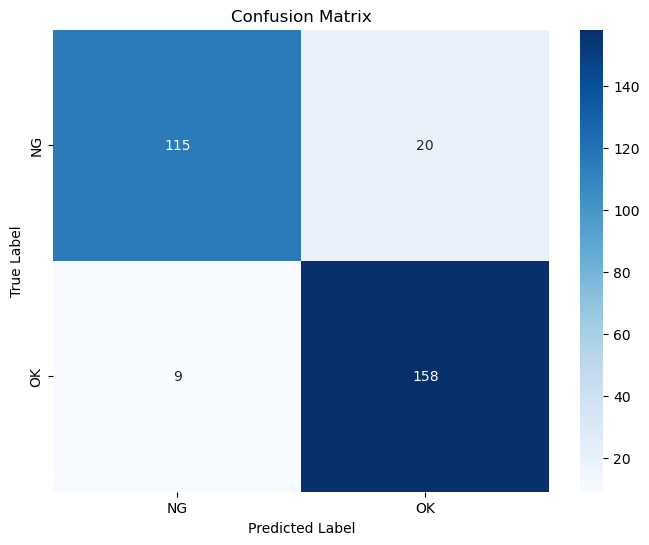

Classification Report:
              precision    recall  f1-score   support

          NG       0.93      0.85      0.89       135
          OK       0.89      0.95      0.92       167

    accuracy                           0.90       302
   macro avg       0.91      0.90      0.90       302
weighted avg       0.91      0.90      0.90       302



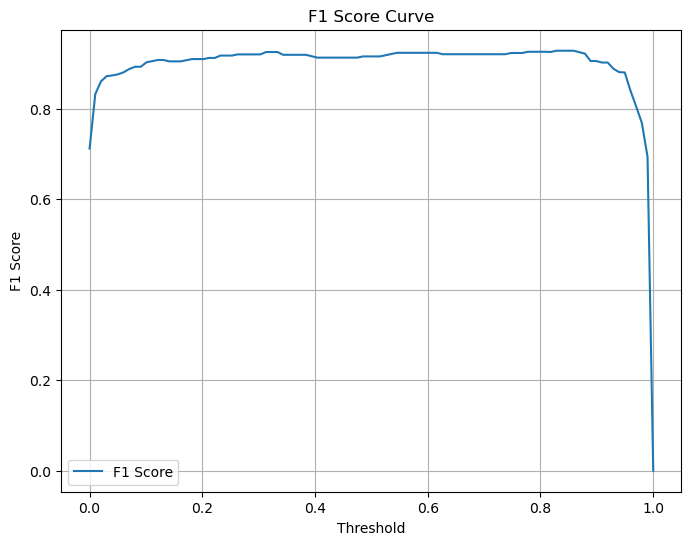

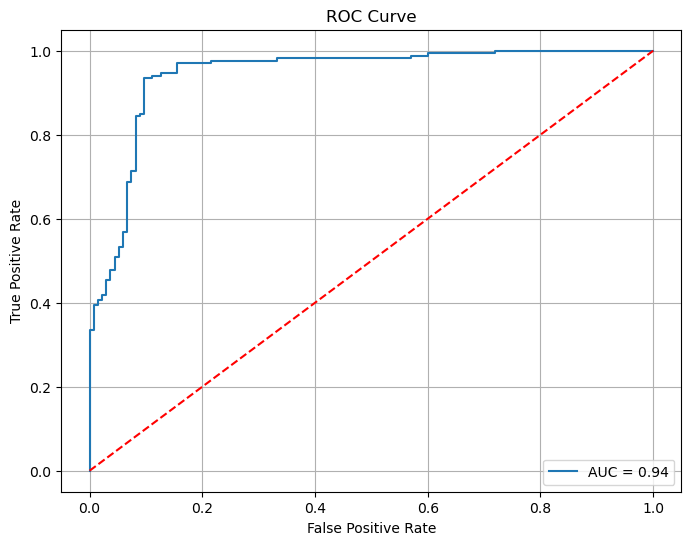

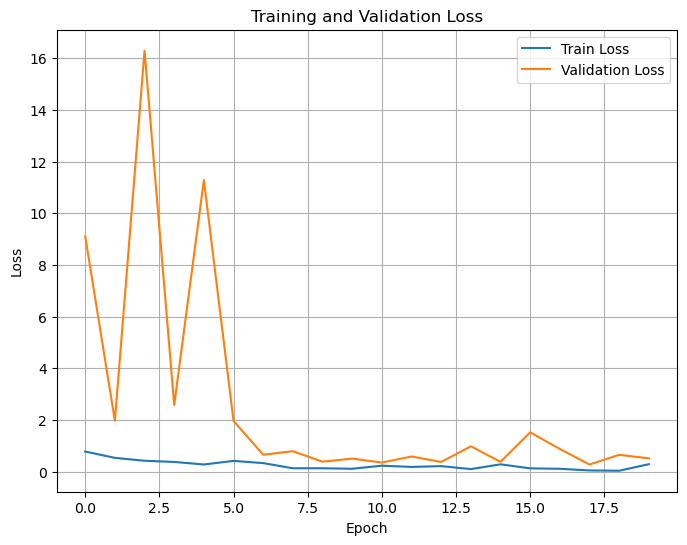

Test Accuracy: 90.40%


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision import transforms
from torch.utils.data import DataLoader

# ResNet 모델 설정
model = models.resnet101(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 클래스 수: 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ConfusionMatrixEvaluator 클래스 선언 (위에서 정의한 코드 사용)
evaluator = Evaluator(model, test_loader, device)

# 학습 루프
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # 에포크당 평균 학습 손실 계산
    avg_train_loss = running_loss / len(train_loader)
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:  # val_loader를 사용해 Validation Loss 계산
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)  # Validation Loss 평균

    # Training 및 Validation Loss 업데이트
    evaluator.update_training_loss(train_loss=avg_train_loss, val_loss=avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# 테스트 데이터 평가
evaluator.evaluate()

# Confusion Matrix 출력
evaluator.plot_confusion_matrix()

# Classification Report 출력
evaluator.print_classification_report()

# F1-Score Curve 출력
evaluator.plot_f1_score_curve()

# ROC Curve 출력
evaluator.plot_roc_curve()

# 학습 및 검증 손실 곡선 출력
evaluator.plot_training_curves()


# 정확도 출력
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:  # test_loader 사용
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

class Evaluator:
    def __init__(self, model, test_loader, device):
        """
        Confusion Matrix 및 학습/평가 지표를 제공하는 클래스.

        Args:
        - model: PyTorch 모델.
        - test_loader: 테스트 데이터 로더.
        - device: 모델 디바이스 ('cuda' 또는 'cpu').
        """
        self.model = model
        self.test_loader = test_loader
        self.device = device
        self.y_true = []
        self.y_pred = []
        self.y_scores = []
        self.train_losses = []
        self.val_losses = []

    def evaluate(self):
        """모델 평가 - y_true, y_pred, y_scores 저장."""
        self.model.eval()
        self.y_true = []
        self.y_pred = []
        self.y_scores = []

        with torch.no_grad():
            for inputs, labels in self.test_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                probabilities = torch.nn.functional.softmax(outputs, dim=1)[:, 1]  # Positive class 확률
                _, predicted = torch.max(outputs, 1)
                
                self.y_true.extend(labels.cpu().numpy())
                self.y_pred.extend(predicted.cpu().numpy())
                self.y_scores.extend(probabilities.cpu().numpy())

    def plot_confusion_matrix(self):
        """Confusion Matrix 생성 및 시각화."""
        cm = confusion_matrix(self.y_true, self.y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NG', 'OK'], yticklabels=['NG', 'OK'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

    def print_classification_report(self):
        """Classification Report 출력."""
        print("Classification Report:")
        print(classification_report(self.y_true, self.y_pred, target_names=['NG', 'OK']))

    def plot_f1_score_curve(self):
        """F1-Score Curve 생성."""
        thresholds = np.linspace(0, 1, 100)
        f1_scores = []

        for threshold in thresholds:
            y_pred_threshold = (np.array(self.y_scores) >= threshold).astype(int)
            f1 = f1_score(self.y_true, y_pred_threshold)
            f1_scores.append(f1)

        plt.figure(figsize=(8, 6))
        plt.plot(thresholds, f1_scores, label="F1 Score")
        plt.xlabel('Threshold')
        plt.ylabel('F1 Score')
        plt.title('F1 Score Curve')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_roc_curve(self):
        """ROC Curve 생성."""
        fpr, tpr, _ = roc_curve(self.y_true, self.y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'r--')  # 대각선 기준선
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

    def plot_training_curves(self):
        """학습 및 검증 손실 곡선 시각화."""
        plt.figure(figsize=(8, 6))
        plt.plot(self.train_losses, label='Train Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.grid()
        plt.show()

    def update_training_loss(self, train_loss, val_loss):
        """훈련 중 손실값 업데이트."""
        self.train_losses.append(train_loss)
        self.val_losses.append(val_loss)


In [8]:
#################################################33

In [9]:
# DataLoader 설정
train_loader_2 = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader_2 = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision import transforms
from torch.utils.data import DataLoader

# ResNet 모델 설정
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 클래스 수: 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ConfusionMatrixEvaluator 클래스 선언 (위에서 정의한 코드 사용)
evaluator = Evaluator(model, test_loader_2, device)

# 학습 루프
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_2:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader_2)
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:  # val_loader를 사용해 Validation Loss 계산
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)  # Validation Loss 평균

    # Training 및 Validation Loss 업데이트
    evaluator.update_training_loss(train_loss=avg_train_loss, val_loss=avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

evaluator.evaluate()

evaluator.plot_confusion_matrix()

evaluator.print_classification_report()

evaluator.plot_f1_score_curve()

evaluator.plot_roc_curve()

evaluator.plot_training_curves()

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader_2:  # test_loader 사용
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 224MB/s]


NameError: name 'test_loader_2' is not defined

In [11]:
from collections import Counter
print(Counter([label for _, label in val_dataset]))
print(Counter([label for _, label in train_dataset]))

Counter({1: 97, 0: 68})
Counter({1: 353, 0: 259})


In [1]:
##############################

In [5]:
# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

print(f"Train data: {len(train_dataset)}")
print(f"Validation data: {len(val_dataset)}")
print(f"Test data: {len(test_dataset)}")

Train data: 612
Validation data: 165
Test data: 302


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15 | Train Loss: 0.8753 | Val Loss: 2.8657
Epoch 2/15 | Train Loss: 0.5479 | Val Loss: 2.1740
Epoch 3/15 | Train Loss: 0.4174 | Val Loss: 42.4676
Epoch 4/15 | Train Loss: 0.4034 | Val Loss: 4.3609
Epoch 5/15 | Train Loss: 0.2554 | Val Loss: 1.0770
Epoch 6/15 | Train Loss: 0.2431 | Val Loss: 6.1318
Epoch 7/15 | Train Loss: 0.3774 | Val Loss: 0.3404
Epoch 8/15 | Train Loss: 0.3229 | Val Loss: 0.7540
Epoch 9/15 | Train Loss: 0.1579 | Val Loss: 0.4736
Epoch 10/15 | Train Loss: 0.1178 | Val Loss: 0.4110
Epoch 11/15 | Train Loss: 0.0965 | Val Loss: 0.2701
Epoch 12/15 | Train Loss: 0.1036 | Val Loss: 0.8883
Epoch 13/15 | Train Loss: 0.2858 | Val Loss: 0.8468
Epoch 14/15 | Train Loss: 0.1208 | Val Loss: 0.1611
Epoch 15/15 | Train Loss: 0.0898 | Val Loss: 0.5488
Best model saved as final_model_34.pth


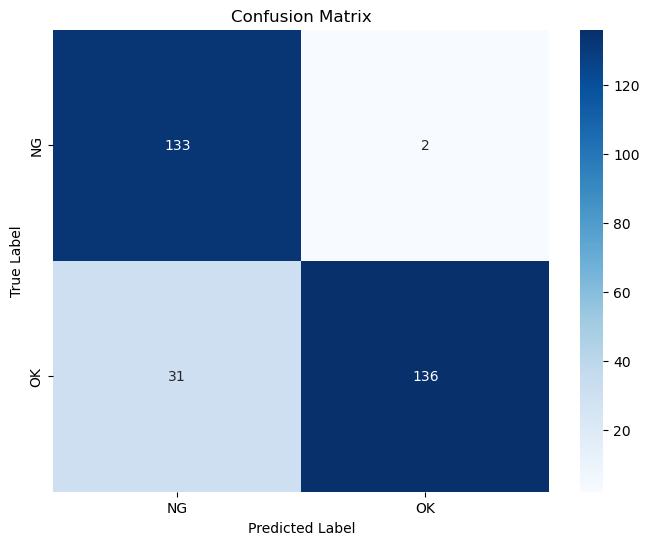

Classification Report:
              precision    recall  f1-score   support

          NG       0.81      0.99      0.89       135
          OK       0.99      0.81      0.89       167

    accuracy                           0.89       302
   macro avg       0.90      0.90      0.89       302
weighted avg       0.91      0.89      0.89       302



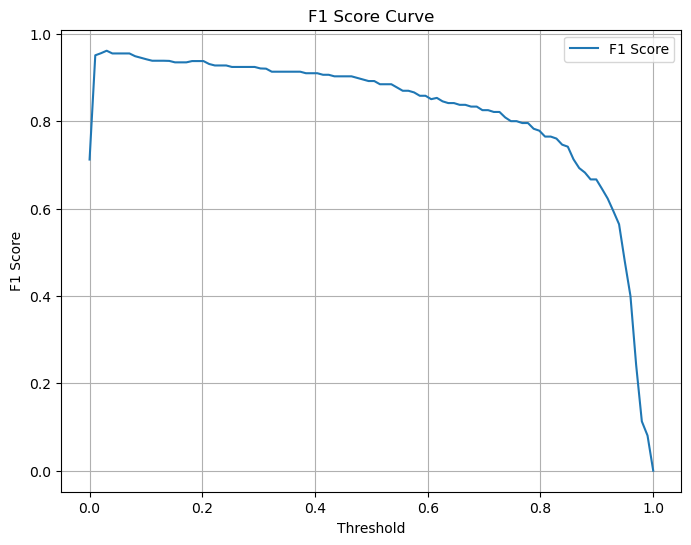

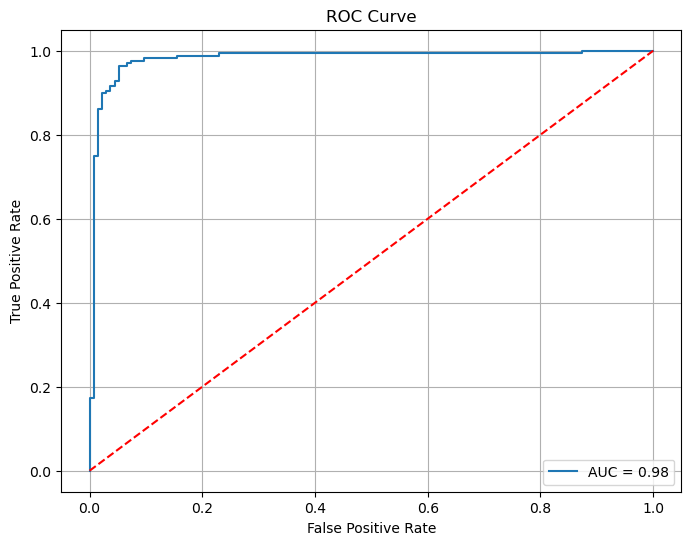

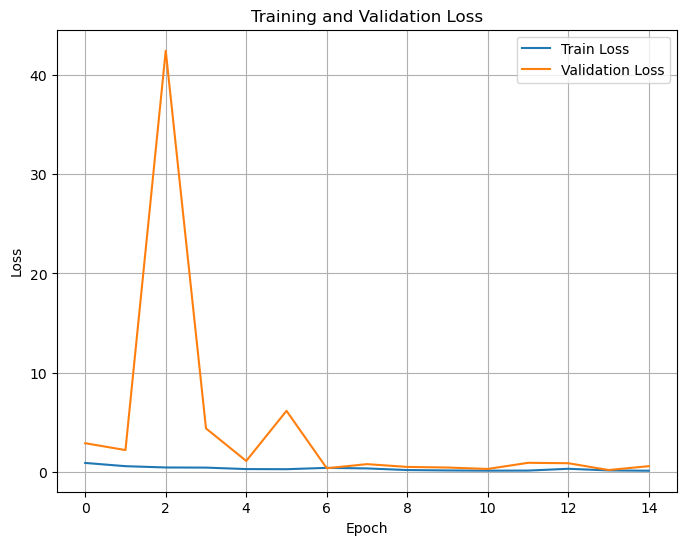

Test Accuracy: 89.07%


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision import transforms
from torch.utils.data import DataLoader

# ResNet 모델 설정
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 클래스 수: 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ConfusionMatrixEvaluator 클래스 선언 (위에서 정의한 코드 사용)
evaluator = Evaluator(model, test_loader, device)

# 조기 종료
patience = 5
best_val_loss = float('inf')
early_stop_counter = 0

# 학습 루프
epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # 에포크당 평균 학습 손실 계산
    avg_train_loss = running_loss / len(train_loader)
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:  # val_loader를 사용해 Validation Loss 계산
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)  # Validation Loss 평균

    # Training 및 Validation Loss 업데이트
    evaluator.update_training_loss(train_loss=avg_train_loss, val_loss=avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
    
    #조기종료 조건확인
    if avg_val_loss < best_val_loss:
        best_avl_loss = avg_val_loss
        early_stop_counter = 0
        # 모델 현재상태 저장
        torch.save(model.state_dict(), "best_model_34.pth")
    else:
        early_stop_counter += 1
        print(f"No improvement in validation loss for {early_stop_counter} epochs.")

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break
        
# 학습 종료 후 최종 모델 저장
torch.save(model.state_dict(), "best_model_34.pth")
print("Best model saved as best_model_34.pth")
        
# 테스트 데이터 평가
evaluator.evaluate()

# Confusion Matrix 출력
evaluator.plot_confusion_matrix()

# Classification Report 출력
evaluator.print_classification_report()

# F1-Score Curve 출력
evaluator.plot_f1_score_curve()

# ROC Curve 출력
evaluator.plot_roc_curve()

# 학습 및 검증 손실 곡선 출력
evaluator.plot_training_curves()


# 정확도 출력
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:  # test_loader 사용
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

In [9]:
# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15 | Train Loss: 1.1703 | Val Loss: 2.8278
Epoch 2/15 | Train Loss: 0.6620 | Val Loss: 227.1605
Epoch 3/15 | Train Loss: 0.5974 | Val Loss: 138.7439
Epoch 4/15 | Train Loss: 0.4615 | Val Loss: 88.7615
Epoch 5/15 | Train Loss: 0.4225 | Val Loss: 0.8963
Epoch 6/15 | Train Loss: 0.2640 | Val Loss: 5.6576
Epoch 7/15 | Train Loss: 0.2593 | Val Loss: 0.6359
Epoch 8/15 | Train Loss: 0.2124 | Val Loss: 0.9491
Epoch 9/15 | Train Loss: 0.1116 | Val Loss: 0.3324
Epoch 10/15 | Train Loss: 0.0791 | Val Loss: 0.3199
Epoch 11/15 | Train Loss: 0.0706 | Val Loss: 2.8740
Epoch 12/15 | Train Loss: 0.0733 | Val Loss: 1.1619
Epoch 13/15 | Train Loss: 0.0566 | Val Loss: 1.2218
Epoch 14/15 | Train Loss: 0.0417 | Val Loss: 0.4850
Epoch 15/15 | Train Loss: 0.0555 | Val Loss: 0.6324
Best model saved as best_model_34.pth


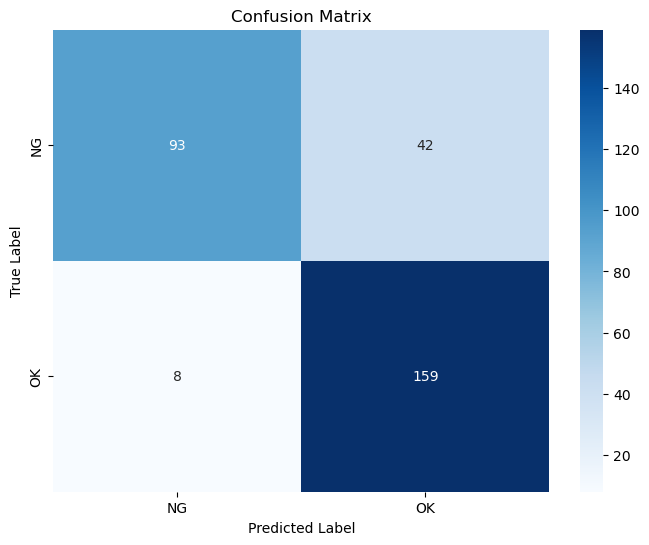

Classification Report:
              precision    recall  f1-score   support

          NG       0.92      0.69      0.79       135
          OK       0.79      0.95      0.86       167

    accuracy                           0.83       302
   macro avg       0.86      0.82      0.83       302
weighted avg       0.85      0.83      0.83       302



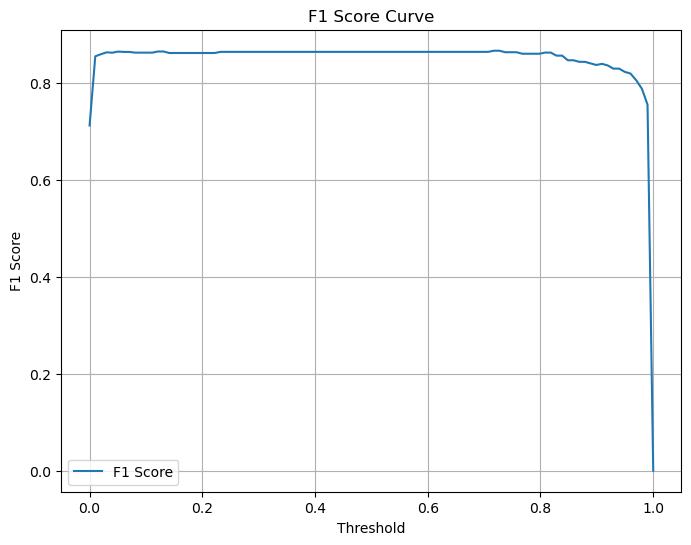

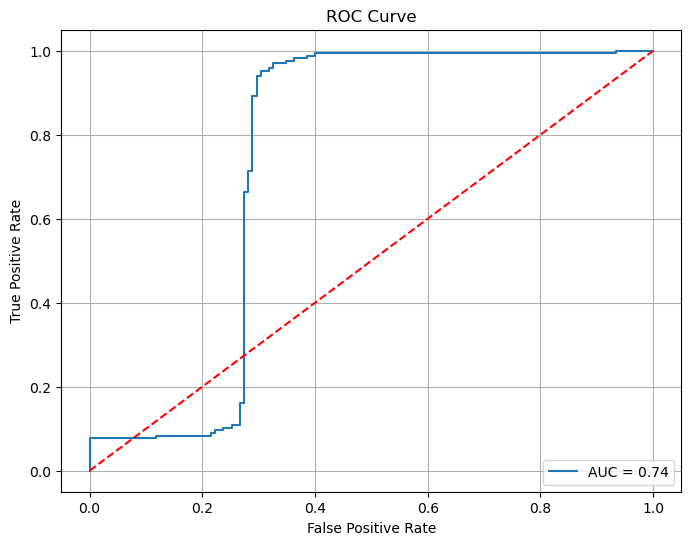

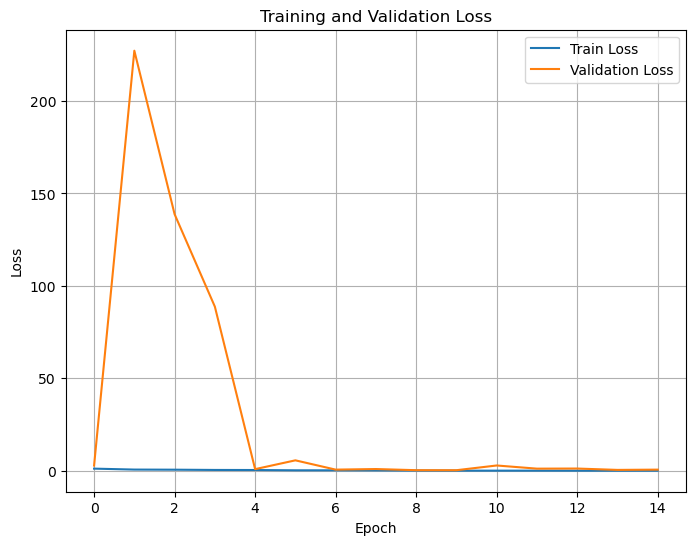

Test Accuracy: 83.44%


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision import transforms
from torch.utils.data import DataLoader

# ResNet 모델 설정
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 클래스 수: 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ConfusionMatrixEvaluator 클래스 선언 (위에서 정의한 코드 사용)
evaluator = Evaluator(model, test_loader, device)

# 조기 종료
patience = 5
best_val_loss = float('inf')
early_stop_counter = 0

# 학습 루프
epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # 에포크당 평균 학습 손실 계산
    avg_train_loss = running_loss / len(train_loader)
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:  # val_loader를 사용해 Validation Loss 계산
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)  # Validation Loss 평균

    # Training 및 Validation Loss 업데이트
    evaluator.update_training_loss(train_loss=avg_train_loss, val_loss=avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
    
    #조기종료 조건확인
    if avg_val_loss < best_val_loss:
        best_avl_loss = avg_val_loss
        early_stop_counter = 0
        # 모델 현재상태 저장
        torch.save(model.state_dict(), "best_model_34_2.pth")
    else:
        early_stop_counter += 1
        print(f"No improvement in validation loss for {early_stop_counter} epochs.")

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break
        
# 학습 종료 후 최종 모델 저장
torch.save(model.state_dict(), "best_model_34.pth")
print("Best model saved as best_model_34.pth")
        
# 테스트 데이터 평가
evaluator.evaluate()

# Confusion Matrix 출력
evaluator.plot_confusion_matrix()

# Classification Report 출력
evaluator.print_classification_report()

# F1-Score Curve 출력
evaluator.plot_f1_score_curve()

# ROC Curve 출력
evaluator.plot_roc_curve()

# 학습 및 검증 손실 곡선 출력
evaluator.plot_training_curves()


# 정확도 출력
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:  # test_loader 사용
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")